# Análise dos casos de óbito de Covid-19 em Indaiatuba

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as wb
from scipy.stats import norm
from datetime import datetime

# 1. Extração dos dados 
Fonte: G1 - Campinas

https://g1.globo.com/sp/campinas-regiao/noticia/2020/06/28/coronavirus-prefeituras-da-regiao-de-campinas-confirmam-novos-casos-neste-domingo-28-de-junho.ghtml

In [2]:
data_atual = datetime.now()
data_em_texto = data_atual.strftime('%d/%m/%Y %H:%M')
print("Última atualização dos dados em: " + str(data_em_texto))

Última atualização dos dados em: 29/06/2020 14:18


In [3]:
base = pd.read_excel("CovidIndaiatuba.xlsx")

In [4]:
base.tail()

,Obitos,Data,Sexo,Idade,anos,Comorbidade
55,56,2020-06-24,Homem,54,"anos,","Sem Comorbidade, ex-tabagista."
56,57,2020-06-24,Homem,65,"anos,",Com Comorbidades
57,58,2020-06-25,Homem,59,"anos,",Sem Comorbidade
58,59,2020-06-26,Homem,53,"anos,",Com Comorbidades
59,60,2020-06-27,Homem,74,"anos,",Com Comorbidades


# 2. Criação das colunas: MesMorte, diferençaDias e MédiaMovel - concatenação 

In [5]:
base.groupby(base['Data'].dt.month)['Obitos'].sum()
base['MesMorte'] = base['Data'].dt.month
base['diferencaDias'] = base['Data'] - base['Data'].min()
base['MédiaMovel'] = base['Obitos'].rolling(2).mean()
base

,Obitos,Data,Sexo,Idade,anos,Comorbidade,MesMorte,diferencaDias,MédiaMovel
0,1,2020-03-31,Homem,64,"anos,",Com Comorbidades,3,0 days,NaN
1,2,2020-04-13,Mulher,50,"anos,",Com Comorbidades,4,13 days,1.5
2,3,2020-04-18,Mulher,52,"anos,",Sem Comorbidade,4,18 days,2.5
3,4,2020-04-21,Homem,64,"anos,",Com Comorbidades,4,21 days,3.5
4,5,2020-04-24,Mulher,61,"anos,",Com Comorbidades,4,24 days,4.5
5,6,2020-05-02,Mulher,83,"anos,",Com Comorbidades,5,32 days,5.5
6,7,2020-05-06,Homem,38,"anos,",Com Comorbidades,5,36 days,6.5
7,8,2020-05-06,Homem,76,"anos,",Com Comorbidades,5,36 days,7.5
8,9,2020-05-07,Homem,30,"anos,",Com Comorbidades,5,37 days,8.5
9,10,2020-05-07,Homem,55,"anos,","Sem Comorbidade, ex-tabagista.",5,37 days,9.5


# 3. Cálculo por Sexo

In [6]:
pd.crosstab(base['Sexo'],base['Sexo'])

Sexo,Homem,Mulher
Sexo,,
Homem,37,0
Mulher,0,23


In [7]:
print ('Sexo em %')
Afetados = base['Sexo'].value_counts(normalize=True)
print (str(round(Afetados, 4) *100)) 

Sexo em %
Homem     61.67
Mulher    38.33
Name: Sexo, dtype: float64


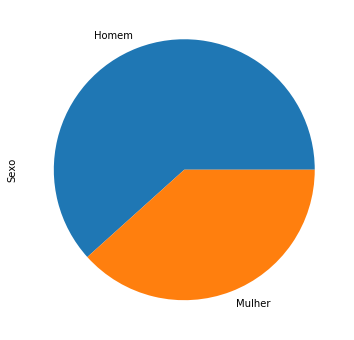

In [8]:
base['Sexo'].value_counts().plot(kind = "pie", figsize = (6,6))

# 4. Agrupando os dados pelo mês do óbito

In [9]:
ObitosMes = base.groupby(base['Data'].dt.month)['Obitos'].count()
ObitosMes

Data
3     1
4     4
5    22
6    33
Name: Obitos, dtype: int64

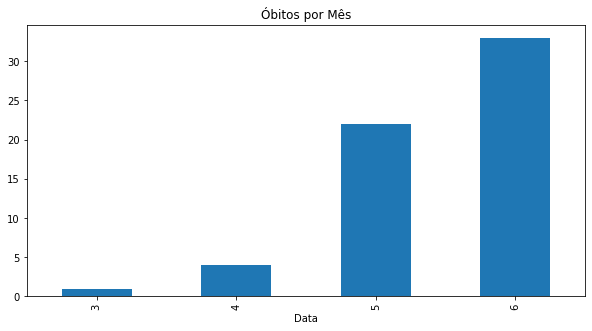

In [10]:
ObitosMes.plot(kind = "bar", figsize = (10,5), title='Óbitos por Mês')

# 4.1 Variação percentual de óbitos por mês

In [11]:
ObitosMes1 = ObitosMes.shift(1)

In [12]:
variacao = (ObitosMes - ObitosMes1)/ObitosMes1 * 100
variacao

Data
3      NaN
4    300.0
5    450.0
6     50.0
Name: Obitos, dtype: float64

# 5. Calculando o total de dias desde a primeira morte

In [13]:
a = base['diferencaDias'] = base['Data'] - base['Data'].min()
a.tail()

55   85 days
56   85 days
57   86 days
58   87 days
59   88 days
Name: Data, dtype: timedelta64[ns]

# 6. Verifando se com coborbidades ou sem comorbidades

In [14]:
pd.crosstab(base['Comorbidade'],base['Comorbidade'])

Comorbidade,Com Comorbidades,Sem Comorbidade,"Sem Comorbidade, ex-tabagista."
Comorbidade,,,
Com Comorbidades,45,0,0
Sem Comorbidade,0,13,0
"Sem Comorbidade, ex-tabagista.",0,0,2


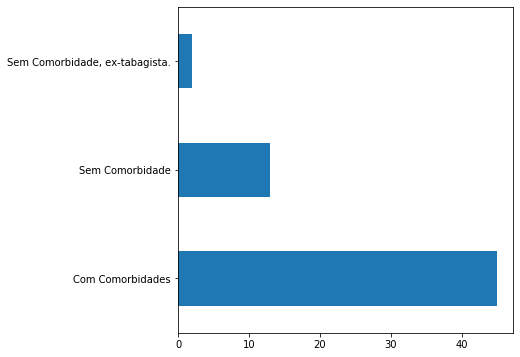

In [15]:
base['Comorbidade'].value_counts().head().plot(kind = "barh", figsize = (6,6))

# 7. Gráfico com exibição dos Óbitos no tempo

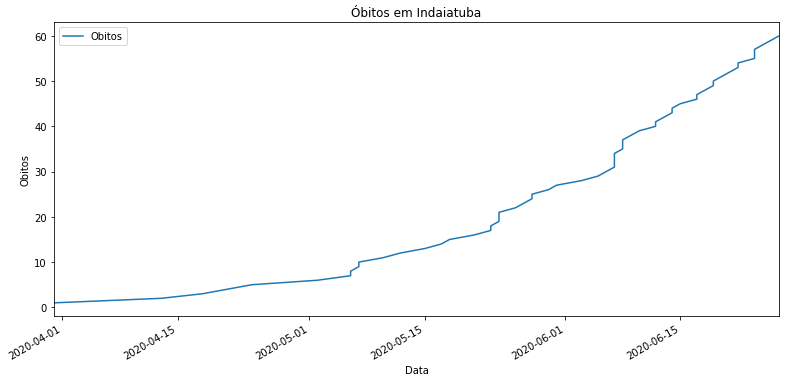

In [16]:
base.plot(x='Data', y='Obitos', figsize=(13,6));
plt.title('Óbitos em Indaiatuba')
plt.ylabel('Obitos')
plt.xlabel('Data')
plt.show()

# 8. Média de idades dos óbitos


In [17]:
base['Idade'].mean()

65.08333333333333

# 9 .Desvio Padrão de idades dos óbitos

In [18]:
base['Idade'].std()

14.397847846079985

# 10. Mediana de idades dos óbitos

In [19]:
base['Idade'].median()

66.5

# 11. Frequencia de idades dos óbitos

In [20]:
base['Idade'].mode()

0    67
1    86
dtype: int64

# 12. Gráfico com a Frequencia de idade dos óbitos

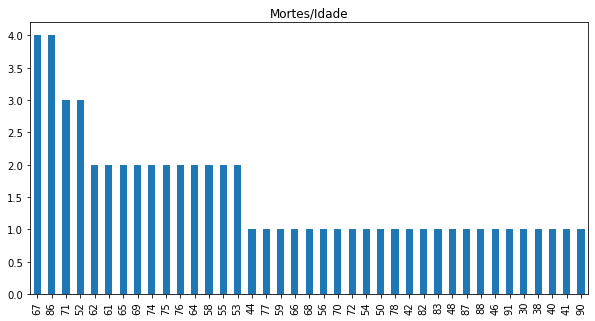

In [21]:
base['Idade'].value_counts().plot(kind='bar',figsize = (10,5), title='Mortes/Idade')

# 13. Caculando log para cálculo para simulação

In [22]:
log_obitos = np.log(1 + base['Obitos'].pct_change())

In [23]:
base['Obitos'].tail()

55    56
56    57
57    58
58    59
59    60
Name: Obitos, dtype: int64

# 14. Gráfico com log para cálculo da simulção

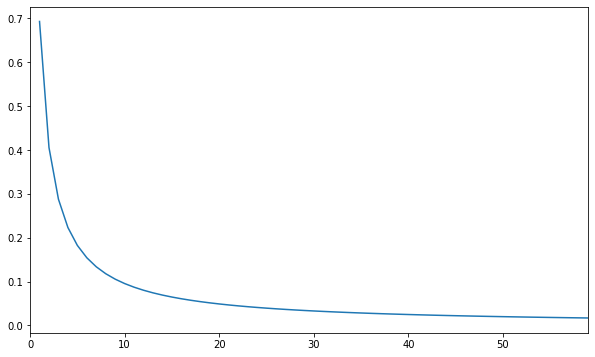

In [24]:
log_obitos.plot(figsize=(10,6))

In [25]:
u = log_obitos.mean()
u

0.06939567054613728

In [26]:
var = log_obitos.var()
var

0.011661945842254466

In [27]:
drift = u - (0.5 * var)
drift

0.06356469762501005

In [28]:
stdev = log_obitos.std()
stdev

0.10799048959169721

In [29]:
type(drift)

float

In [30]:
type(stdev)

float

In [31]:
np.array(drift)

array(0.0635647)

In [32]:
drift

0.06356469762501005

In [33]:
stdev

0.10799048959169721

In [34]:
norm.ppf(0.95)

1.6448536269514722

In [35]:
x = np.random.rand(10,2)
x

array([[0.85617809, 0.43725553],
       [0.77100308, 0.53869007],
       [0.46917038, 0.90542269],
       [0.39510415, 0.22314039],
       [0.2008048 , 0.10843756],
       [0.72290642, 0.39618169],
       [0.71764529, 0.17991599],
       [0.07957317, 0.17928532],
       [0.35208123, 0.89650654],
       [0.29200912, 0.61101671]])

In [36]:
norm.ppf(x)

array([[ 1.06330464, -0.15793115],
       [ 0.74215431,  0.09713416],
       [-0.07735549,  1.31308407],
       [-0.26604013, -0.76163014],
       [-0.83875002, -1.23488013],
       [ 0.59149746, -0.26324289],
       [ 0.57586059, -0.91568528],
       [-1.40794842, -0.91809213],
       [-0.37970763,  1.26189401],
       [-0.54752479,  0.28196992]])

In [37]:
z= norm.ppf(np.random.rand(10,4))
z

array([[-1.01957878, -1.75654007, -0.55329545, -3.42622422],
       [ 0.97295554, -0.64925507,  0.10369867,  1.24756816],
       [ 0.9393913 , -0.11101679,  0.83638783, -2.52694884],
       [ 0.40723613, -0.19126621, -0.02521133, -1.43383007],
       [-0.42085176,  0.01743254, -0.03029381, -1.29733999],
       [-1.12749965, -2.02576311, -1.68629454,  0.94370838],
       [ 1.15589809, -0.72398839, -0.04179878,  0.31810042],
       [ 0.84749714, -0.29600495, -0.36893427,  0.53295362],
       [-0.75485782, -0.01422947, -3.79555594,  1.27725822],
       [ 0.15745588, -0.4280084 , -0.04394258, -0.49914292]])

In [38]:
t_intervals = 30
iterations = 10

In [39]:
daily_obitos = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_obitos

array([[1.00966152, 1.09817151, 1.01450495, 0.97452404, 0.94522239,
        1.14516023, 1.03306269, 0.99446099, 1.0475903 , 1.153371  ],
       [0.83188058, 0.92700035, 1.12126425, 1.10790636, 1.23789508,
        1.05317553, 1.07035168, 1.04410715, 0.8838528 , 0.9922975 ],
       [0.95326932, 1.02956029, 0.85875581, 1.00965557, 0.98836762,
        1.00920421, 0.92073945, 1.19561925, 1.22265362, 1.04528266],
       [0.99743423, 0.89772663, 0.94791975, 1.12182751, 0.92755221,
        1.22257647, 1.18982653, 1.09173279, 1.05912943, 1.00736076],
       [0.97930513, 1.19599483, 1.21344744, 1.16646294, 0.92968217,
        1.09836189, 1.2468786 , 1.14925006, 1.01584326, 1.30557415],
       [0.84604004, 0.93450249, 1.18800747, 1.27885035, 1.04306247,
        1.00957121, 1.13290852, 1.10342261, 1.27799909, 0.92174301],
       [0.92132307, 1.17208661, 0.94397445, 0.96694843, 0.95718619,
        1.12316164, 1.21050079, 1.05055033, 1.01183795, 1.09333384],
       [1.18929842, 1.08028239, 1.1307395

In [40]:
last_data = base['Obitos'].iloc[-1]
last_data

60

In [41]:
obito_list = np.zeros_like(daily_obitos)
obito_list

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [42]:
obito_list[0] = last_data
obito_list

array([[60., 60., 60., 60., 60., 60., 60., 60., 60., 60.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [43]:
for t in range (1, t_intervals):
    obito_list[t] = obito_list[t-1]* daily_obitos[t]

In [44]:
obito_list

array([[ 60.        ,  60.        ,  60.        ,  60.        ,
         60.        ,  60.        ,  60.        ,  60.        ,
         60.        ,  60.        ],
       [ 49.91283466,  55.62002092,  67.27585493,  66.47438156,
         74.27370482,  63.19053201,  64.22110102,  62.64642903,
         53.03116795,  59.53785005],
       [ 47.58037409,  57.264165  ,  57.77353107,  67.11622979,
         73.40972493,  63.7721512 ,  59.13090097,  74.9012762 ,
         64.83874957,  62.23388227],
       [ 47.4582938 ,  51.40756573,  54.76467094,  75.29283314,
         68.09135267,  77.96633151,  70.3555149 ,  81.77217956,
         68.67262763,  62.6919707 ],
       [ 46.47615057,  61.48318258,  66.45404953,  87.82629918,
         63.30331667,  85.63524705,  87.72478575,  93.9766825 ,
         69.76062587,  81.84901613],
       [ 39.32068439,  57.45618701,  78.94790747, 112.31669308,
         66.02931391,  86.45488017,  99.38415751, 103.69599658,
         89.15401653,  75.44375882],
       [ 3

In [45]:
obito_list.min()

36.22705350045721

In [46]:
obito_list.max()

793.468222368929

In [47]:
obito_list.mean()

191.51974141436713

In [48]:
obito_list.std()

155.95265802565328

In [49]:
np.median(obito_list)

133.91015391266598

# 15. Simulação de Monte Carlo para os óbitos em Indaiatuba

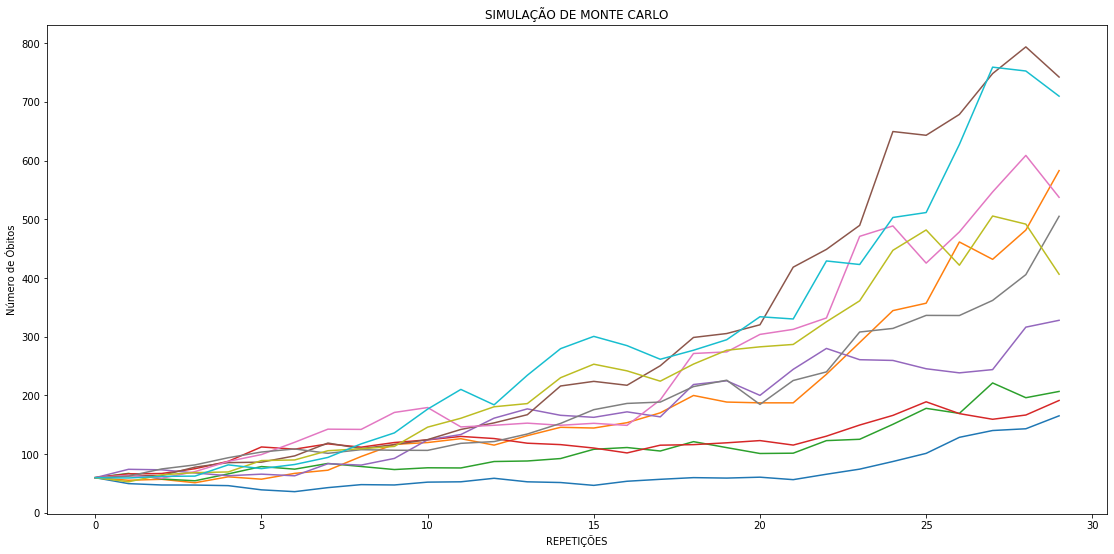

In [50]:
plt.figure(figsize=(19,9))
plt.plot(obito_list);
plt.title('SIMULAÇÃO DE MONTE CARLO');
plt.xlabel('REPETIÇÕES'); #definindo nome do eixo X
plt.ylabel('Número de Óbitos'); #definindo nome do eixo Y


In [51]:
print(f'Óbitos mínimos, {obito_list.min():.0f}'' pessoas')
print(f'Óbitos mediana, {np.median(obito_list):.0f}'' pessoas')
print(f'Óbitos médio, {obito_list.mean():.0f}'' pessoas')
print(f'Óbitos máximo, {obito_list.max():.0f}'' pessoas')
print('Óbitos atual,',(str(round(base['Obitos'].iloc[-1]))),'pessoas') #informar o ticker

Óbitos mínimos, 36 pessoas
Óbitos mediana, 134 pessoas
Óbitos médio, 192 pessoas
Óbitos máximo, 793 pessoas
Óbitos atual, 60 pessoas


# 16. Cálculo de mortes por dia

In [52]:
diferencaDias = base['diferencaDias'] = base['Data'] - base['Data'].min()
diferencaDias.tail()

55   85 days
56   85 days
57   86 days
58   87 days
59   88 days
Name: Data, dtype: timedelta64[ns]

In [53]:
last_data

60

In [54]:
diasCorridos = a.loc[59:].astype('timedelta64[D]') #atualizar com índice da última data = last_data

In [55]:
diasCorridos

59    88.0
Name: Data, dtype: float64

In [56]:
ObitosDia = last_data/diasCorridos
ObitosDia

59    0.681818
Name: Data, dtype: float64

# Principais Conclusões

1 A cada dois dias uma pessoa vem a óbito

2 Predominância do sexo masculino

3 O viés é ascendente